# **Data Visualization 2 - Charting with Python - Lecture 1 - Scatter plots**
---

In [1]:
# importing the libraries that we are gonna use
import plotly
import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.templates.default = 'plotly_white'

# Scatter plots

We use scatter plots to determine whether or not two variables have a relationship or correlation. The plot uses dots to represent values for the two numeric variables.

## Base version

Let's use the built in version of the `tips()` dataset to create a basic scatter plot that we will customize.

In [2]:
df_tips = px.data.tips()

chart_size = {'height' : 500, 'width' : 800}

In [3]:
df_tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

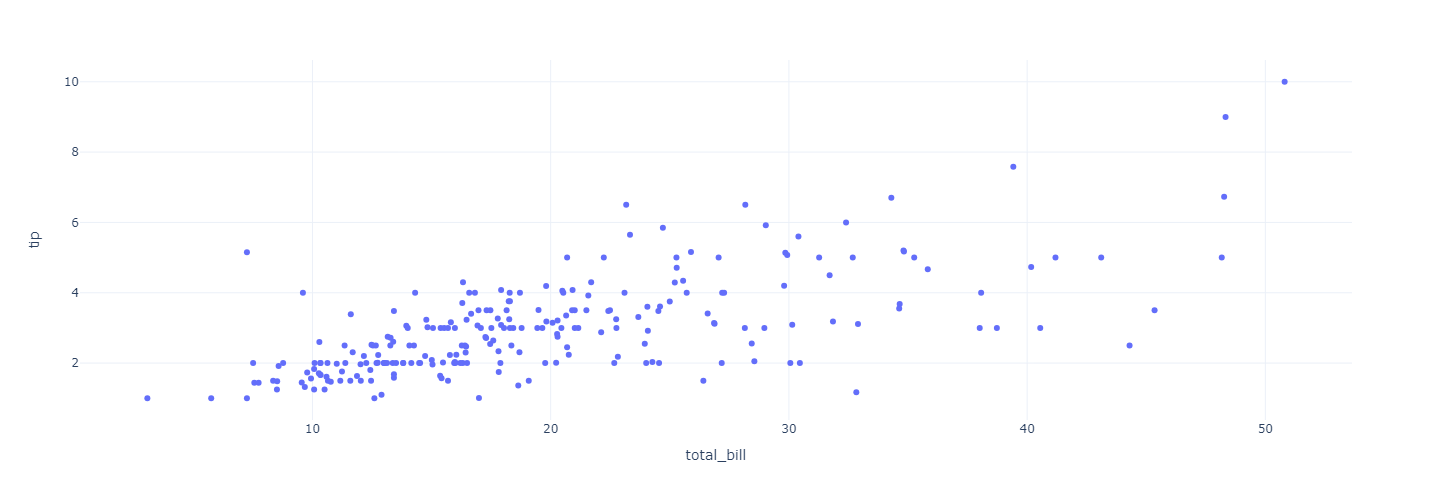

In [4]:
scatter = px.scatter(df_tips, x = 'total_bill', y = 'tip')

scatter.update_layout(chart_size)

## Adding a title

Plotly doesn't generate a title for scatter plots either but adding a title to our plot is just as easy as it was when we did it whilst customizing our bar charts.

In [5]:
title_ = 'Comparing Total bill and Tip values'

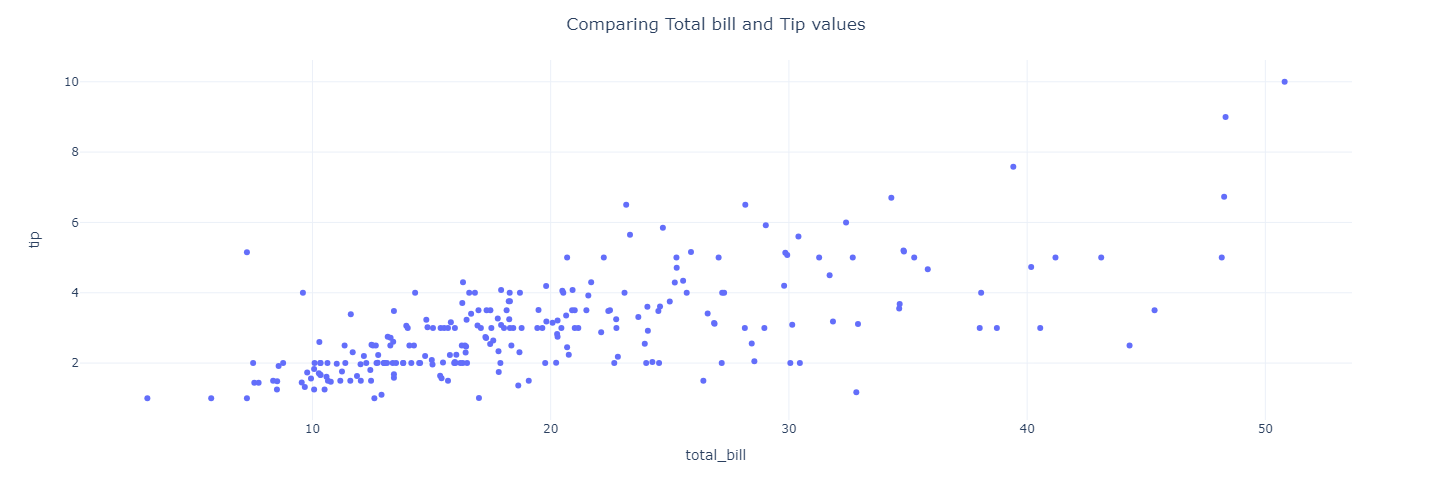

In [6]:
scatter.update_layout(title_text = title_, title_x = 0.5)

## Changing the labeling
Adjusting the labels of our scatter plot is also similar to what we did when we were creating bar charts.

In [7]:
# making a seperate dictionary for labels
labels_ = {
           'total_bill' : 'Total Bill',
           'tip' : 'Tip',
           'smoker' : 'Smoker',
           'size' : 'Size',
           'sex' : 'Gender'
          }

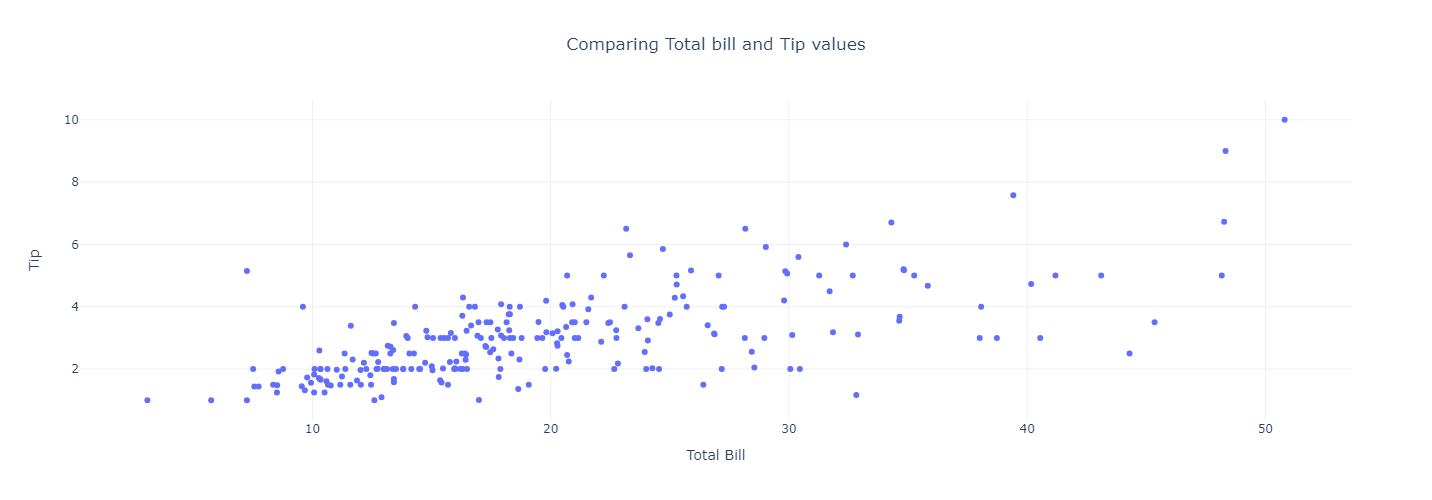

In [8]:
# creating the scatter plot with labels
scatter = px.scatter(df_tips, x = 'total_bill', y = 'tip',
                     labels = labels_,
                     title = title_
                    )

scatter.update_layout(chart_size, title_x = 0.5)

## Adjusting the size of traces

Since our dataset has a `'size'` column which represents how many people sat at the specific tables we can use those values to control the size of dots on our scatter plot.

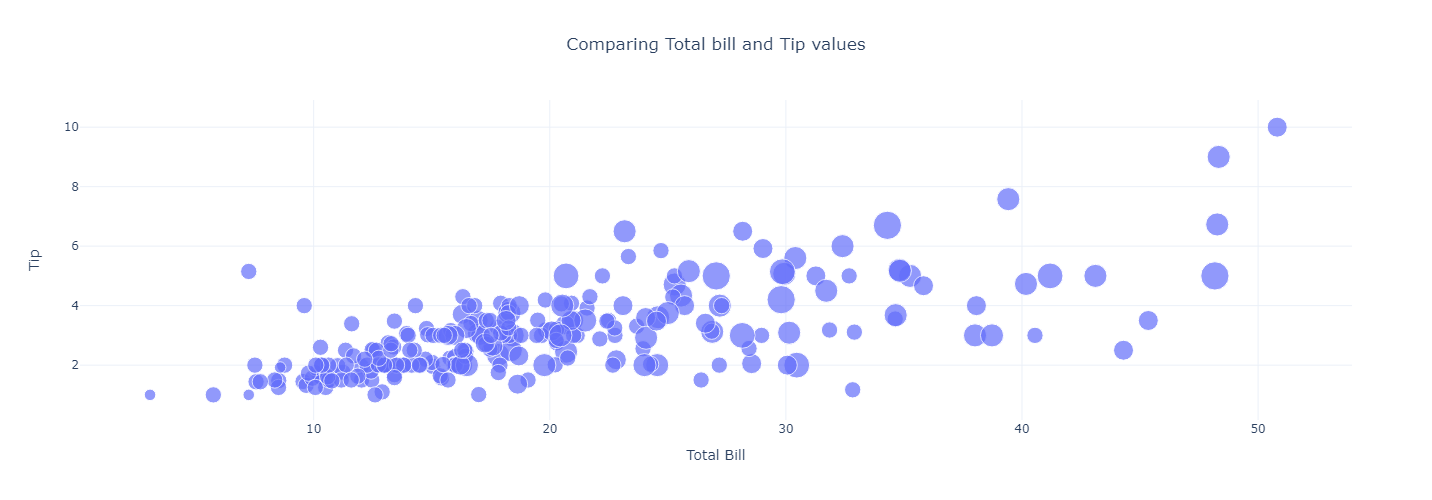

In [9]:
scatter = px.scatter(df_tips, x = 'total_bill', y = 'tip',
                     labels = labels_,
                     title = title_,
                     size = 'size'
                    )

scatter.update_layout(chart_size, title_x = 0.5)

## Modifying the hover menu
We can see that the size column has been automatically added to the hover menu. We can explicitly tell Plotly not to use this column if we want to.

In [10]:
df_tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

### Removing data from the hover menu

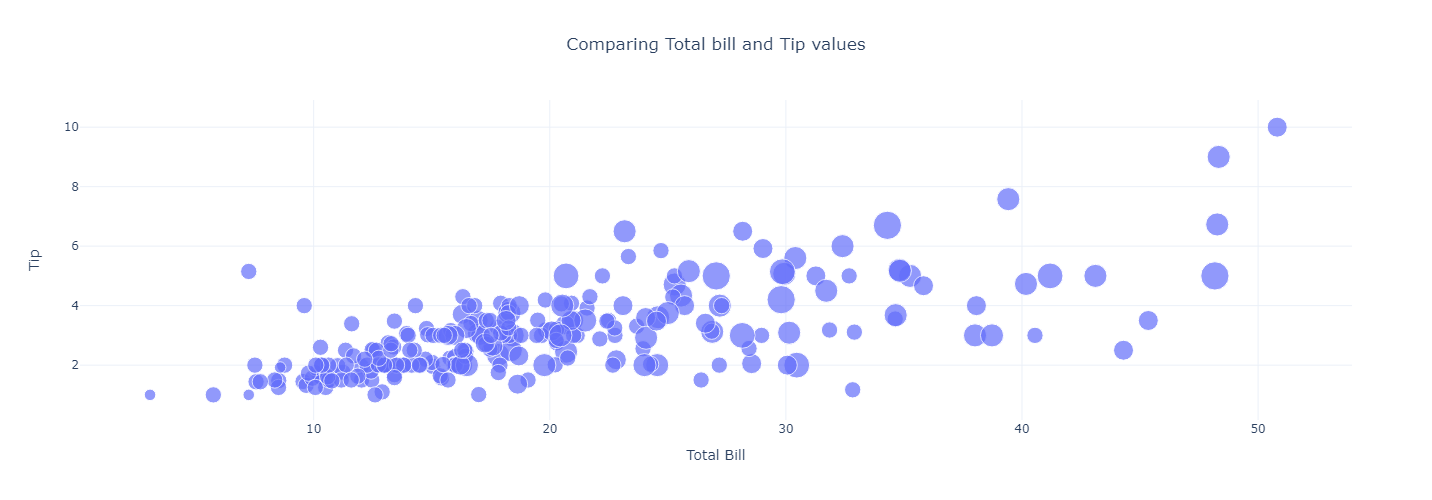

In [11]:
# using the hover_data attribute
scatter = px.scatter(df_tips, x = 'total_bill', y = 'tip',
                     labels = labels_,
                     title = title_,
                     size = 'size',
                     hover_data = {'size' : False, 'sex': True, 'day': True, 'time':True}
                    )

scatter.update_layout(chart_size, title_x = 0.5)

### Formatting data included in the hover menu

Formatting hover menu data is similar to what we did with the texttemplate attribute before.

In this case we need to extend the `hover_data` dictionary.

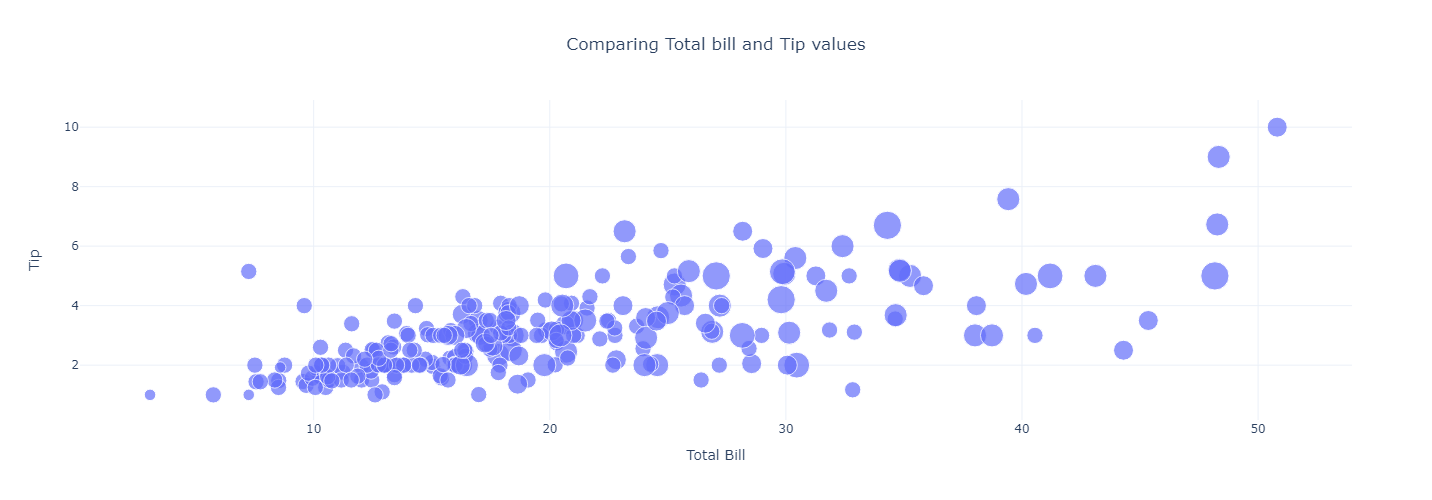

In [12]:
scatter = px.scatter(df_tips, x = 'total_bill', y = 'tip',
                     labels = labels_,
                     title = title_,
                     size = 'size',
                     hover_data = {'size' : False,
                                   'total_bill' : ':.1f',
                                   'tip' : ':.1f'
                                  })

scatter.update_layout(chart_size, title_x = 0.5)

## Trendlines

Plotly also supports Linear (OLS) and Non-Linear Trendlines (LOWESS).

Let's take a look at this by creating the previous chart once again with an OLS trendline.

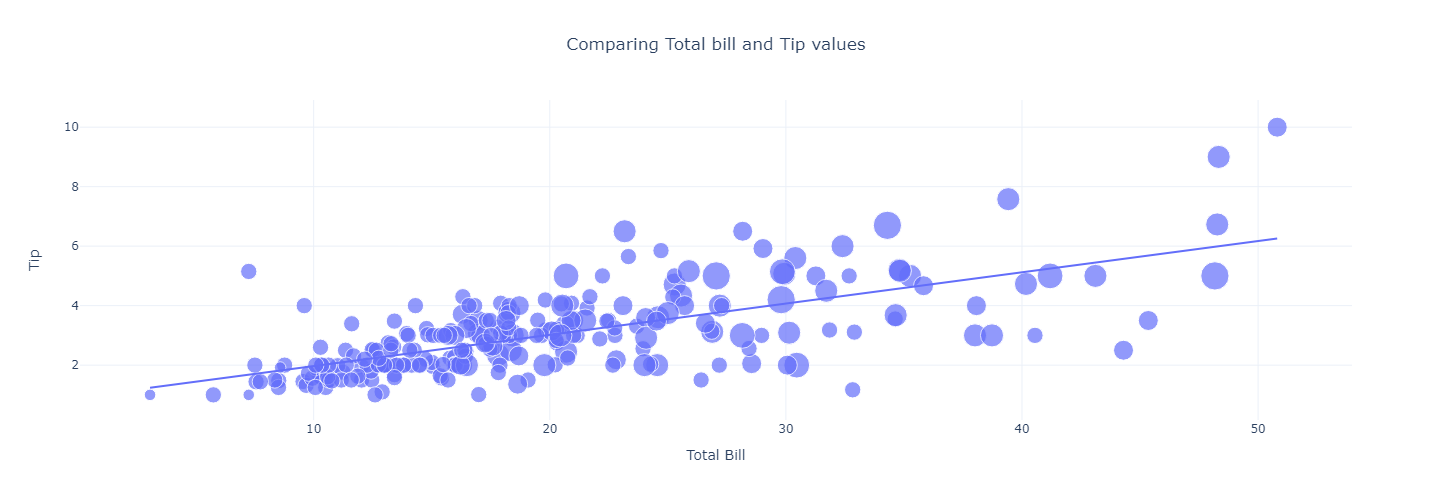

In [13]:
# adding the trendline attribute to the px.scatter call
scatter = px.scatter(df_tips, x = 'total_bill', y = 'tip',
                     labels = labels_,
                     title = title_,
                     size = 'size',
                     hover_data = {'size' : False,
                                   'total_bill' : ':.1f',
                                   'tip' : ':.1f'
                                  },
                     trendline = 'ols'
                     )

scatter.update_layout(chart_size, title_x = 0.5)

### Changing the color of the trendline

To make the trendline stand out better from the scatter traces we can override the color of the trendline.

To do this we can use the `trendline_color_override` attribute.

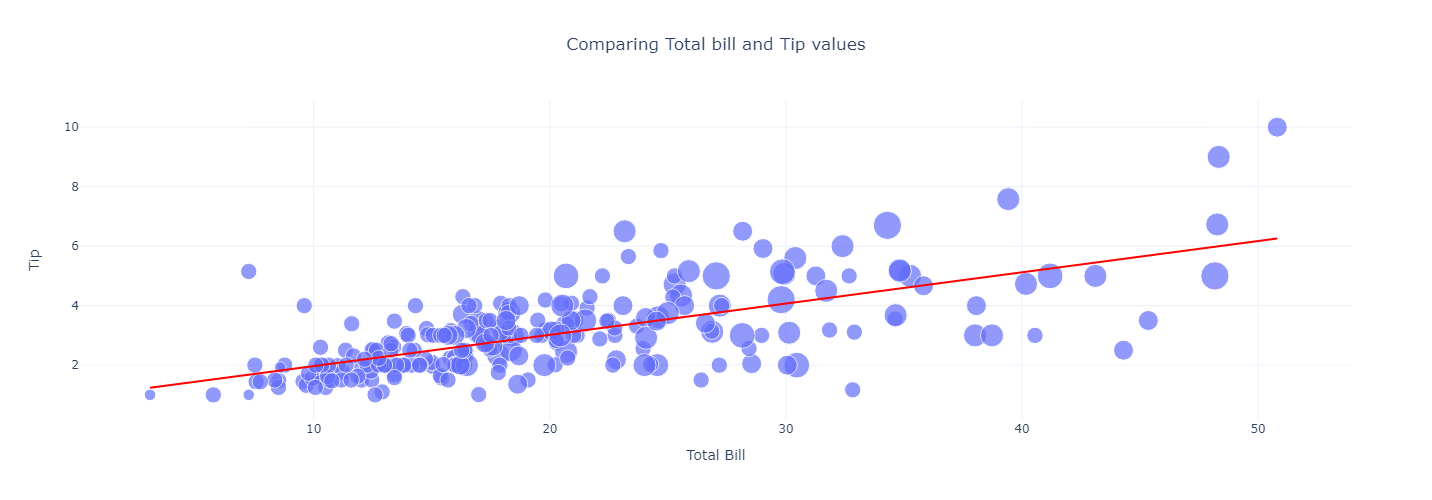

In [14]:
scatter = px.scatter(df_tips, x = 'total_bill', y = 'tip',
                     labels = labels_,
                     title = title_,
                     size = 'size',
                     hover_data = {'size' : False,
                                   'total_bill' : ':.1f',
                                   'tip' : ':.1f'
                                  },
                     trendline = 'ols',
                     trendline_color_override = 'rgba(255,0,0,1)'
                     )

scatter.update_layout(chart_size, title_x = 0.5)

## Changing the opacity of the dots

We can use the opacity attribute of the `update_traces()` method but the problem with that is that it changes the opacity of all of the chart elements.

So to overcome this we will use the `trendline_color_override` attribute as well in a tricky way.

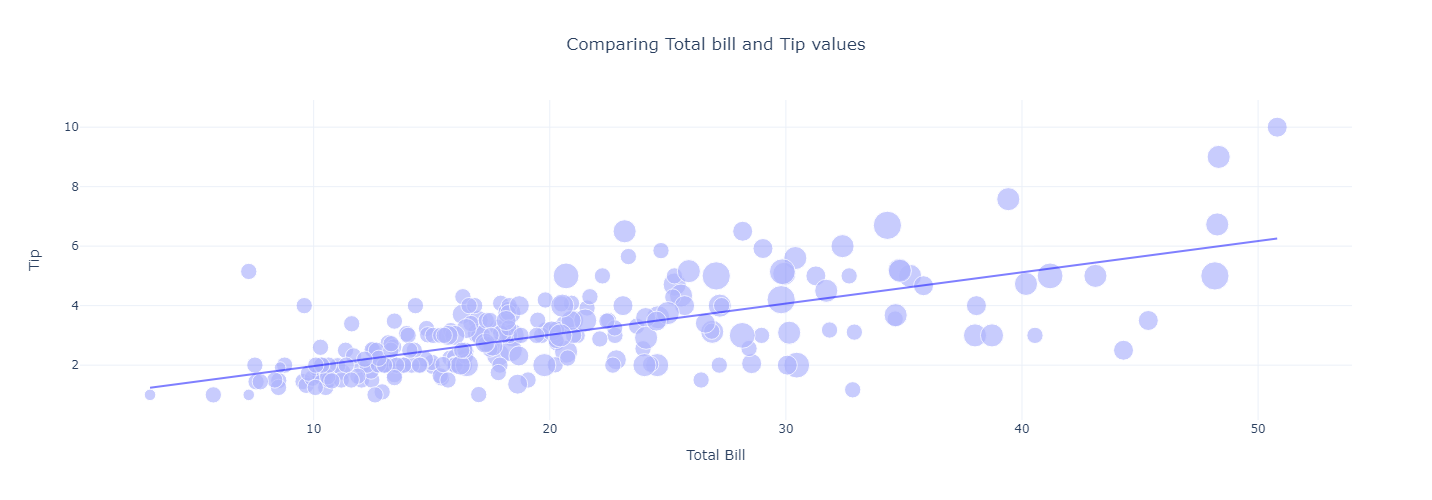

In [15]:
# using the aplha channel value to change the dot and trendline opacity
scatter = px.scatter(df_tips, x = 'total_bill', y = 'tip',
                     labels = labels_,
                     title = title_,
                     size = 'size',
                     hover_data = {'size' : False, 'total_bill' : ':.1f',
                                   'tip' : ':.1f'},
                     trendline = 'ols',
                     trendline_color_override = 'rgba(0, 0, 255, 1)'
                    )

scatter.update_layout(chart_size, title_x = 0.5)

# using the opacity attribute to change the dots
scatter.update_traces(opacity = 0.5)

## Coloring with a third column

Changing the coloring of our scatter plots is simple and similar to how we have handled the coloring of our bar charts.

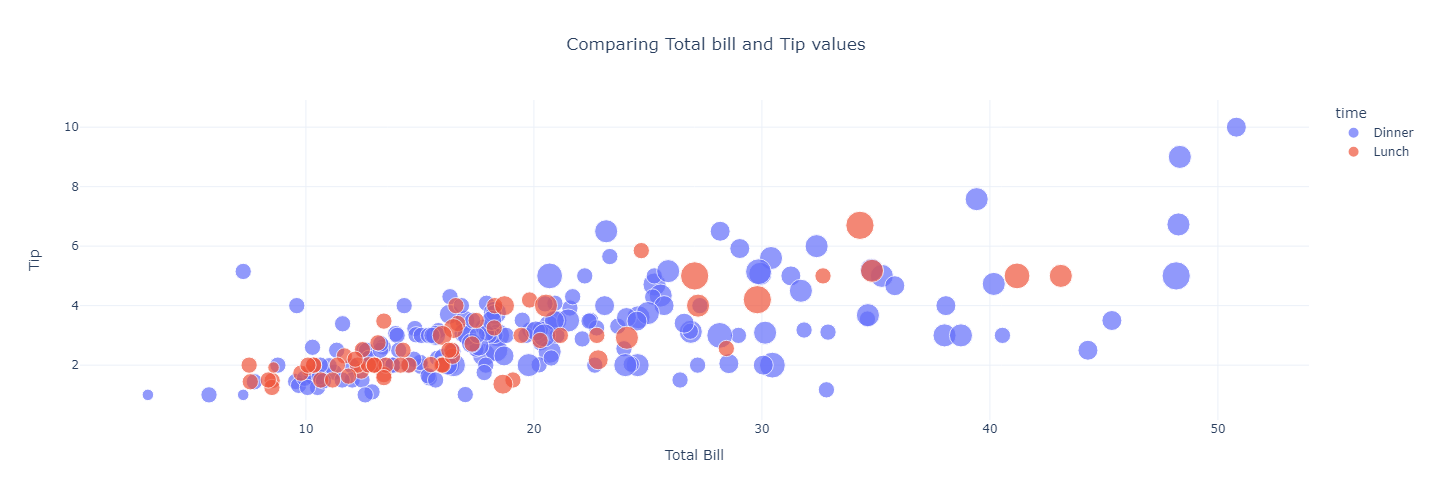

In [16]:
# adding the color attribute
scatter = px.scatter(df_tips, x = 'total_bill', y = 'tip',
                     labels = labels_,
                     title = title_,
                     size = 'size',
                     hover_data = {'size' : False,
                                   'total_bill' : ':.1f',
                                   'tip' : ':.1f'
                                  },
                     color = 'time'
                     )

scatter.update_layout(chart_size, title_text = title_, title_x = 0.5)

## Changing the color of the gridlines

To change the color of the gridlines we can use the `gridcolor` attribute of both the `update_xaxes()` and `update_yaxes()` methods.



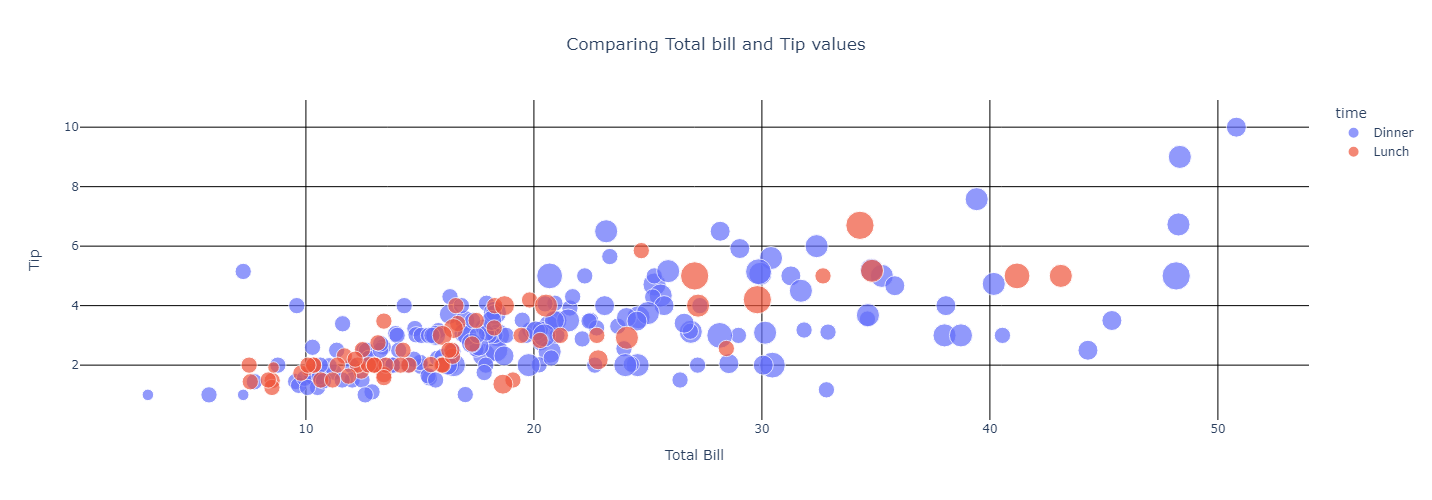

In [17]:
scatter.update_xaxes(gridcolor='Black')
scatter.update_yaxes(gridcolor='Black')

## Adding data labels

Lets go back to the gapminder dataset and visualize the relationship of the life expextancy and GDP Per Capita values.

In [18]:
df = px.data.gapminder()

df.shape

(1704, 8)

We can see that the dataframe has 1704 rows originally but these would be way too many scatter dots for us to use data labels so lets filter down the dataframe.

In [19]:
df = px.data.gapminder().query("year == 2007 and continent=='Asia' and pop > 30e6")

df.shape

(13, 8)

We can see that the result of the filtering is that we now have 13 rows only. Let's create the chart and add data labels to it.

In [20]:
# creating a labels dictionary
labels_ = {
    'pop' : 'Population',
    'lifeExp' : 'Life Expectancy',
    'country' : 'Country',
    'gdpPercap': 'GDP Per Capita',
    'continent' : 'Continent',
    'year' : 'Year'
}

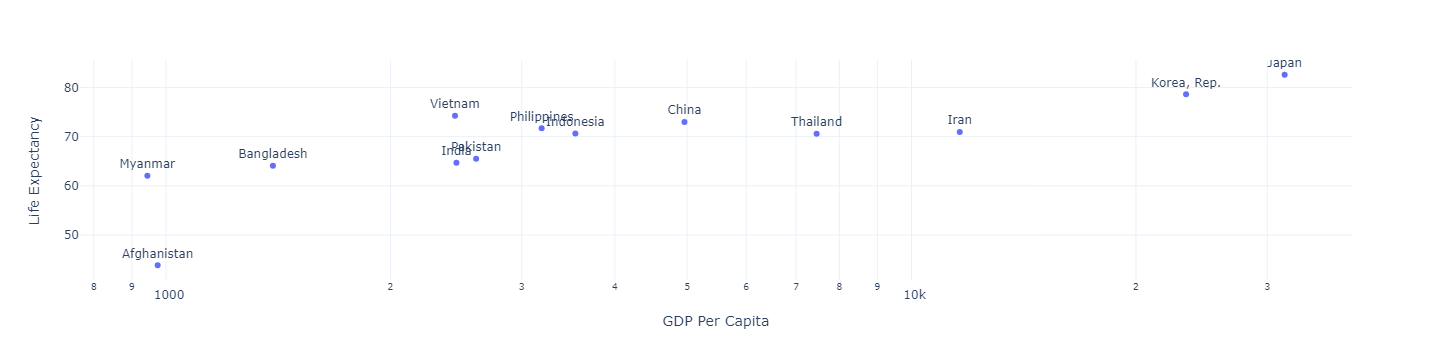

In [21]:
# using the text column to add the labels for the dots
fig = px.scatter(df, x="gdpPercap", y="lifeExp", width = 800, log_x = True,
                 text="country", labels = labels_)

fig.update_layout(plot_bgcolor = 'white')

fig.update_traces(textposition='top center')

## Animated scatter plots

Scatter plots support the creation of animated figures through the animation_frame and animation_group arguments.

Let's go back to the scatter plot we created at the intro part of the lecture and animate it.

In [22]:
# resetting the df
df_gapminder = px.data.gapminder()

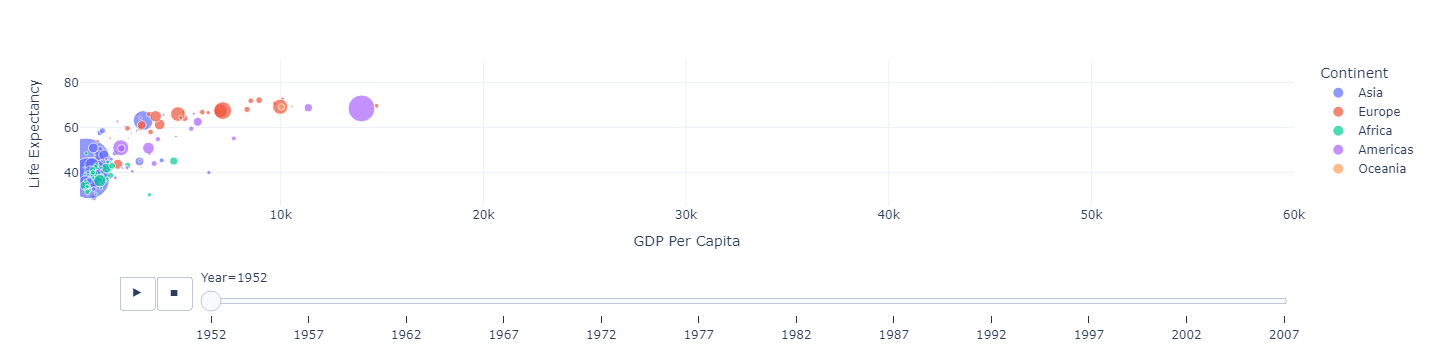

In [23]:
# using the animation_frame and animation_group parameters
animatedGap = px.scatter(df_gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                         size="pop", color="continent", hover_name="country", labels = labels_,
                         size_max=55, range_x=[100,60000], range_y=[25,90],
                         width = 800)

animatedGap.update_layout(plot_bgcolor = 'white')

animatedGap.show()

To make the dots more spread out we can set the x axis to a logarithmic scale using the `log_x` parameter.

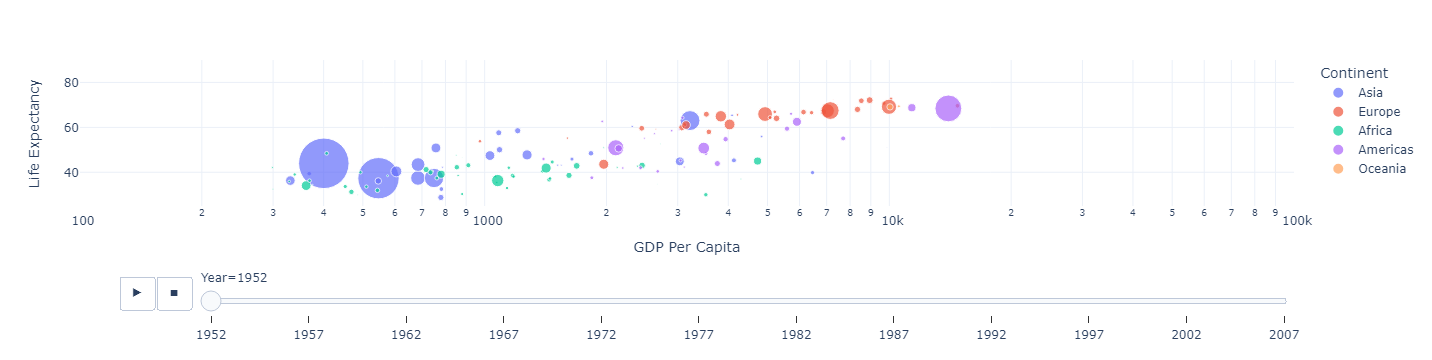

In [24]:
# setting the x axis to a logarithmic scale
animatedGap = px.scatter(df_gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                         size="pop", color="continent", hover_name="country", labels = labels_,
                         log_x = True, size_max=55, range_x=[100,100000], range_y=[25,90],
                         width = 800)

animatedGap.update_layout(plot_bgcolor = 'white')

animatedGap.show()

### Slowing down the animation

If we want the frames of the animation to be longer then we can set the duration of each frame to 1000 which will set a delay of 1 sec between the frames.

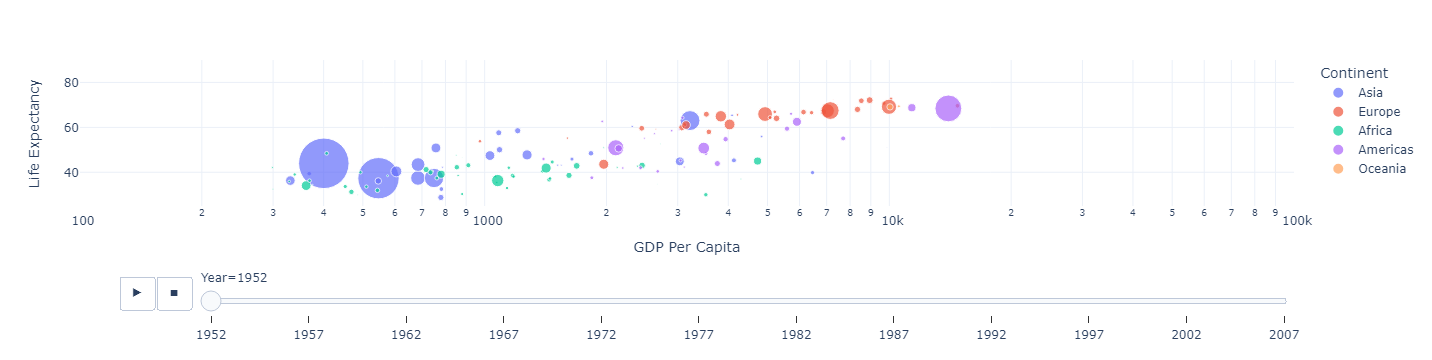

In [25]:
animatedGap.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

animatedGap.show()

### Using the animation layout for filtering

If we hide the play and stop buttons we can still use the animation frame slider for filtering our dataframe. To achive this we can use the `pop()` method to remove the 'updatemenus' element.

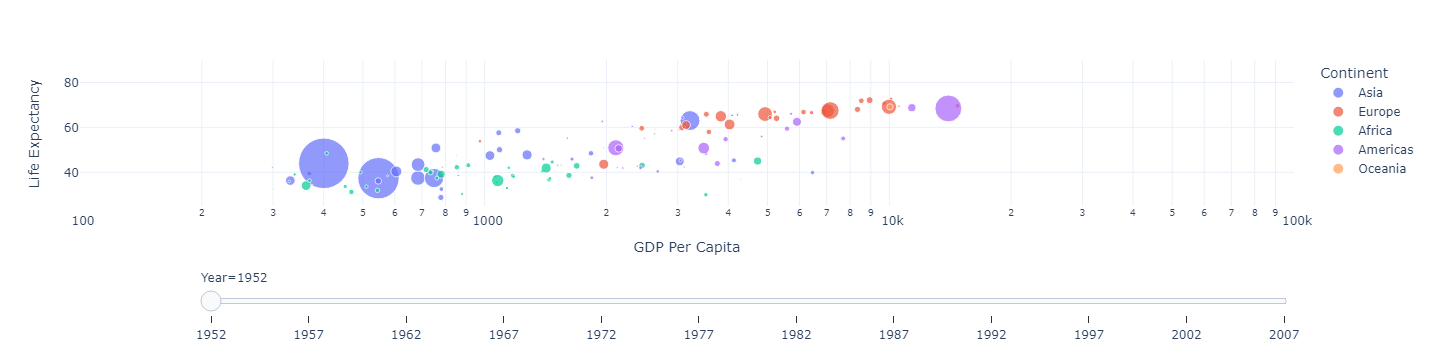

In [26]:
animatedGap = px.scatter(df_gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                         size="pop", color="continent", hover_name="country", labels = labels_,
                         log_x = True, size_max=55, range_x=[100,100000], range_y=[25,90],
                         width = 800)

animatedGap["layout"].pop("updatemenus")

animatedGap.update_layout(plot_bgcolor = 'white')

animatedGap.show()

## Practice exercise

### Code

In [27]:
labels_ = {
    'pop' : 'Population',
    'lifeExp' : 'Life Expectancy',
    'country' : 'Country'
}

title_ = 'Population vs Life Expectancy'

df_gap = px.data.gapminder().query('continent == "Americas" and year == 2002 and pop > 20e6')

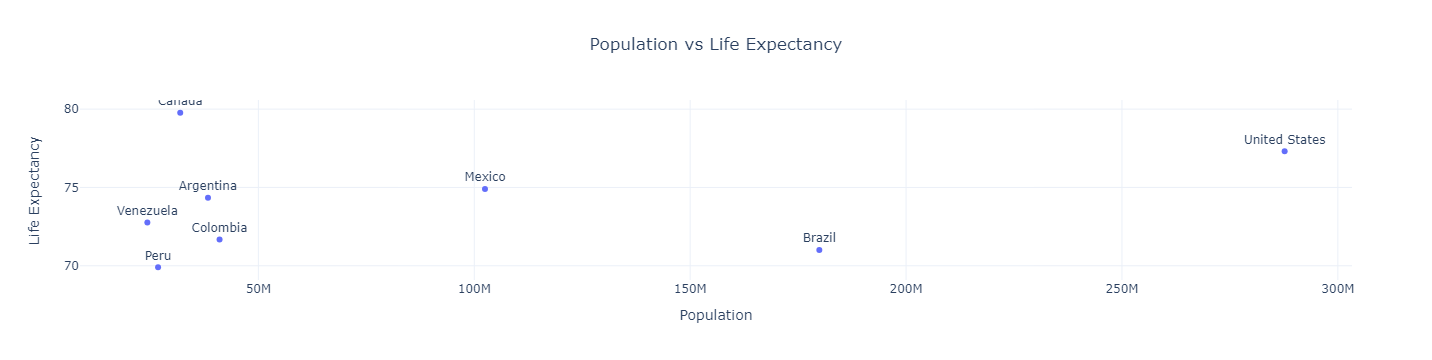

In [28]:
scatter_gap = px.scatter(df_gap, x = 'pop', y = 'lifeExp',
                         title = title_,
                         labels = labels_,
                         width = 900,
                         text = 'country'
                         )

scatter_gap.update_traces(textposition='top center')

scatter_gap.update_layout(plot_bgcolor = 'white', title_x = 0.5)

### Chart

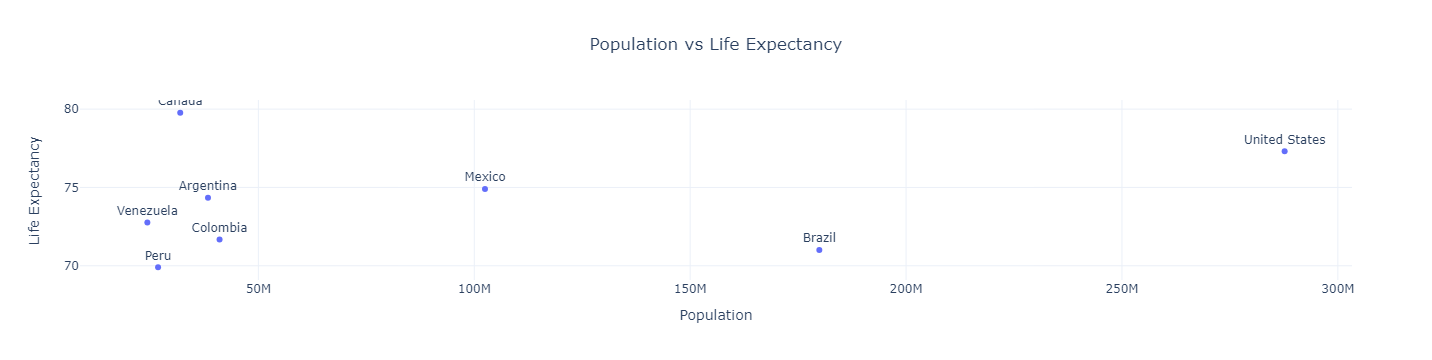

In [29]:
scatter_gap.show()